In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
with np.load(r'C:\Temp\samples.npz', allow_pickle=True) as data:
    harku_samples_x = data['harku_samples_x']
    harku_samples_y = data['harku_samples_y']
    tartu_samples_x = data['tartu_samples_x']
    tartu_samples_y = data['tartu_samples_y']

In [31]:
data_x = np.vstack([harku_samples_x, tartu_samples_x])
data_y = np.vstack([harku_samples_y, tartu_samples_y])

In [33]:
data_y.shape

(321456, 3, 2)

In [4]:
harku_samples_x[0]

array([[ 0.        , -0.02261611, -0.06132244, -1.29208635,  0.21979241,
         0.3008852 ,  0.2611432 ,  0.32216636,  0.1966532 ,  0.89363485,
         0.31414034, -0.35776401, -0.24164121,  0.03731566,  1.03510237,
         1.35447937,  0.80300978,  1.15653942,  1.05601667,  1.14477686,
         0.03674815,  1.87823885,  1.31212624,  0.76589367,  0.49139756,
         1.01969127,  0.77265284, -0.17715417,  1.12895434, -0.20590375],
       [ 0.        , -0.18090211,  0.118954  , -1.29208635,  0.25402934,
         0.31261231,  0.29587369,  0.14018307,  0.17895081,  0.96119401,
         0.2501033 , -0.13742642, -0.11994475,  0.01502428,  1.08464126,
         1.15868658,  0.76271102,  0.98905476,  1.08219153,  1.16388383,
         0.02650059,  1.87095383,  1.21296974, -0.22472219,  0.3799244 ,
         1.22827   ,  0.91033235, -0.24605646,  1.09891325, -0.20615234],
       [ 0.        , -0.05427331,  0.05886185, -1.41408604,  0.26544166,
         0.34779366,  0.28429686,  0.14018307,  0

In [34]:
# Train-test split (e.g., 80-20 split)
#train_size = int(0.8 * len(harku_samples_x))
#X_train, X_test = harku_samples_x[:train_size], harku_samples_x[train_size:]
#y_train, y_test = harku_samples_y[:train_size], harku_samples_y[train_size:]

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.75, random_state=137)

X_train[0]

array([[ 0.00000000e+00,  1.35669885e-01, -1.81506729e-01,
         3.60454817e-01,  6.64872575e-01,  7.11334282e-01,
         7.24216370e-01,  9.89438441e-01, -1.41426512e+00,
         1.05225039e+00, -1.83570242e+00, -2.76580401e-01,
         1.24782377e+00,  2.30389854e+00,  1.75216910e+00,
        -9.77717278e-01, -1.29570540e+00, -1.20273706e+00,
        -8.19550707e-01, -2.45621170e-01,  1.78175886e+00,
         3.04419229e-01, -7.12931802e-01,  1.97161713e+00,
         9.45559158e-01,  3.30501407e+00,  3.37024284e+00,
         4.10004426e-01, -1.31182607e+00, -1.90116431e-01],
       [ 0.00000000e+00, -2.12559311e-01, -2.41598874e-01,
         2.60636894e-01,  6.64872575e-01,  6.99607166e-01,
         6.43178565e-01,  1.05009954e+00, -1.43196752e+00,
         1.01378409e+00, -1.82340082e+00, -3.30170589e-01,
         1.20791226e+00,  2.37396362e+00,  1.86232241e+00,
        -1.01257591e+00, -1.14680310e+00, -1.11634506e+00,
        -8.12329548e-01, -2.22888484e-01,  1.79632982e+

In [35]:
X_train.shape

(241092, 12, 30)

In [36]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(12, 30), return_sequences=False))
model.add(Dense(3 * 2, activation='softmax'))  # Assuming binary classification (precipitation or no precipitation)
model.add(Reshape((3, 2)))  # Reshape to (3, num_classes)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                24320     
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
 reshape_1 (Reshape)         (None, 3, 2)              0         
                                                                 
Total params: 24,710
Trainable params: 24,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5274/5274 [==============================] - 27s 5ms/step - loss: 0.2315 - categorical_accuracy: 0.9106 - val_loss: 0.2224 - val_categorical_accuracy: 0.9138
Epoch 2/50
5274/5274 [==============================] - 24s 5ms/step - loss: 0.2174 - categorical_accuracy: 0.9153 - val_loss: 0.2201 - val_categ

In [37]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2512/2512 [==============================] - 4s 2ms/step - loss: 0.2193 - categorical_accuracy: 0.9180
Test Loss: 0.21933811902999878
Test Accuracy: 0.9179981350898743


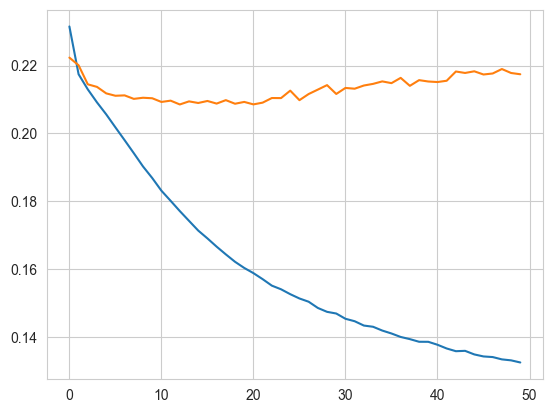

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


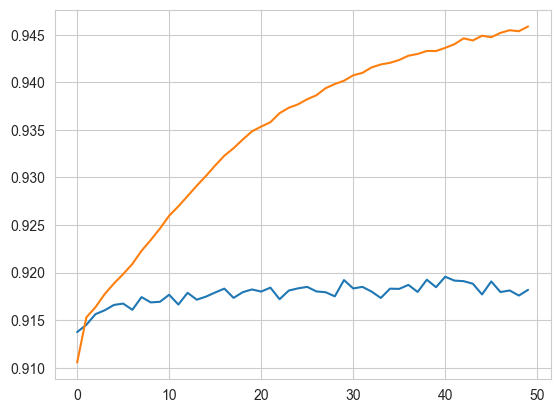

In [42]:
plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history.history['categorical_accuracy'])

In [ ]:
n_features = 10
columns = [f'feature_{i}' for i in range(n_features)]